<a href="https://colab.research.google.com/github/michaelgodoyf/tareas-proc-digi-multimedia/blob/main/Actividades/Actividad%202/Actividad_2_godoy_ferreira_michael_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Michael godoy ferreira </h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

In [3]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git

Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 276 (delta 26), reused 40 (delta 11), pack-reused 219
Receiving objects: 100% (276/276), 9.18 MiB | 25.82 MiB/s, done.
Resolving deltas: 100% (120/120), done.


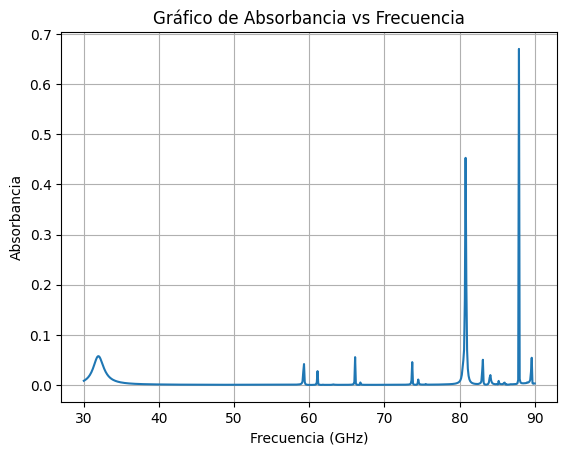

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Cargar el archivo CSV
    datos_csv = pd.read_csv('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/AbsorbanceTE_0-0.csv')

    # Trazar los datos
    plt.plot(datos_csv['Freq [GHz]'], datos_csv['AbsorbanceTE []'])
    plt.xlabel('Frecuencia (GHz)')
    plt.ylabel('Absorbancia')
    plt.title('Gráfico de Absorbancia vs Frecuencia')
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print("El archivo no se encontró. Por favor, verifica la ruta.")
except Exception as e:
    print("Ocurrió un error:", e)


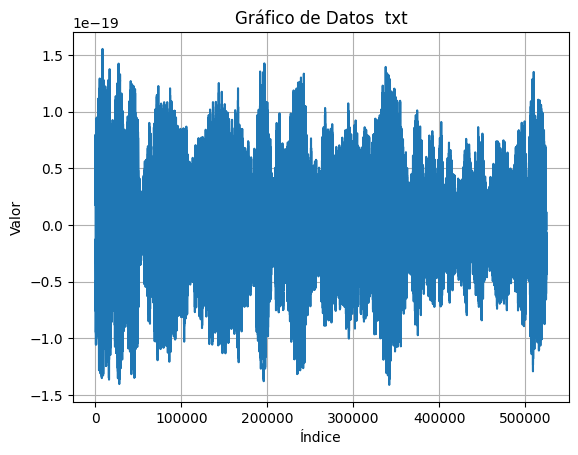

In [61]:
import gzip
import matplotlib.pyplot as plt

# Cargar y descomprimir el archivo .gz
archivo_txt_gz = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz'
with gzip.open(archivo_txt_gz, 'rt') as file:
    datos_txt = file.readlines()

# esto es para omitir las líneas de comentarios y datos que no sirven
datos_numericos = []
for linea in datos_txt:
    if not linea.startswith('#'):  # Verificar si la línea no comienza con #
        datos_numericos.append(linea)

# Procesar los datos del archivo txt
datos_txt = [float(d.strip()) for d in datos_numericos]

# Graficar los datos
plt.plot(range(len(datos_txt)), datos_txt, label='Datos txt')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico de Datos  txt')
plt.grid(True)
plt.show()



## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


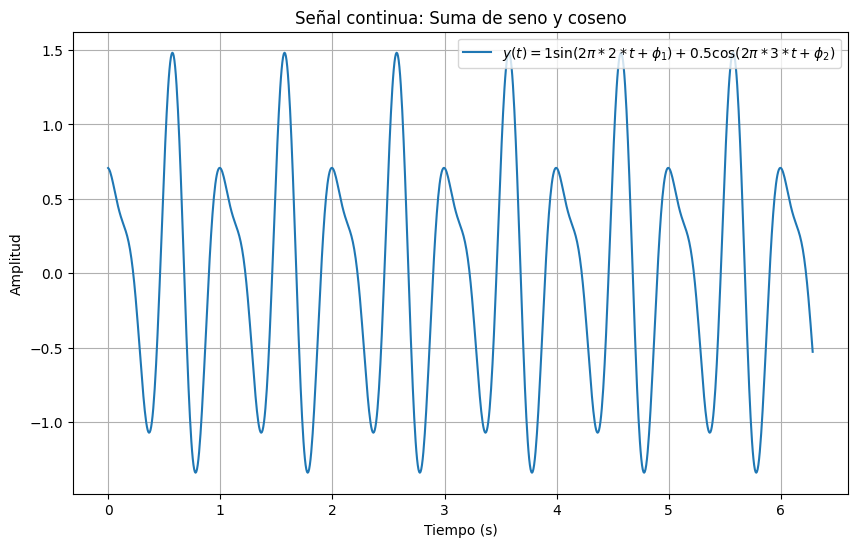

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros de las señales
A1, A2 = 1, 0.5  # Amplitudes
f1, f2 = 2, 3    # Frecuencias (en Hz)
phi1, phi2 = np.pi/4, np.pi/2  # Fases (en radianes)

# intervalo de tiempo
t = np.linspace(0, 2*np.pi, 1000)  # Intervalo de 0 a 2*pi

# señales senoidal y cosenoidal
y = A1 * np.sin(2*np.pi*f1*t + phi1)
X = A2 * np.cos(2*np.pi*f2*t + phi2)

# Sumar las señales
y_total = y + X

# grafico señal resultante
plt.figure(figsize=(10, 6))
plt.plot(t, y_total, label=r'$y(t) = 1 \sin(2\pi*2*t + \phi_1) + 0.5 \cos(2\pi*3*t + \phi_2)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal continua: Suma de seno y coseno')
plt.legend()
plt.grid(True)
plt.show()



## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


El proceso de muestreo  consiste en tomar mediciones de una señal continua en intervalos regulares de tiempo. Cuando muestreamos una señal, estamos discretizando su dominio temporal, es decir, la estamos dividiendo en puntos discretos en el tiempo en lugar de tener una representación continua. Esta discretización se realiza tomando muestras de la señal en momentos específicos del tiempo.

El número de muestras que tomamos durante el muestreo afecta la fidelidad con la que podemos representar la señal continua. Un intervalo de muestreo más pequeño quiere decir que capta mas muestras captura más detalles de la señal original, mientras que un intervalo de muestreo más grande quiere decir que capta menos muestras por lo que  puede perder detalles finos de la señal.


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

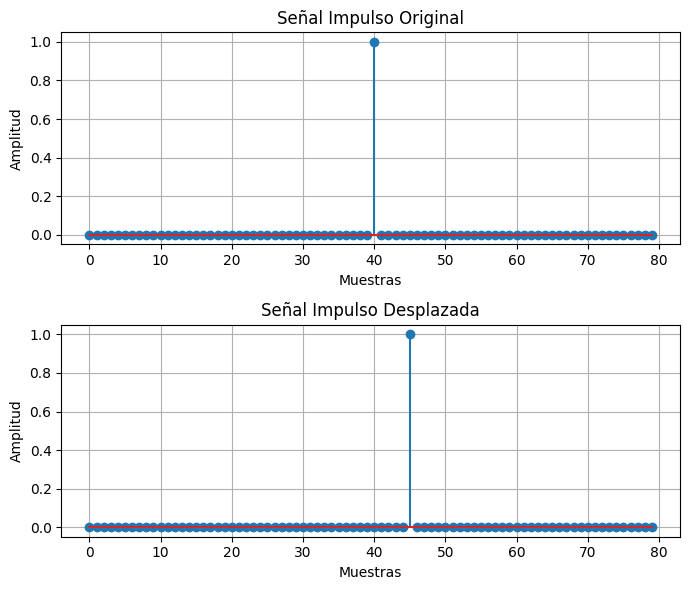

In [100]:
from typing import List
import matplotlib.pyplot as plt

def impulso(n: int, mov: int) -> List[float]:
    impulso = [0] * n #crear puros 0
    impulso[n // 2] = 1 # Colocar el impulso en el centro con ampl 1

    impulso_desplazado = impulso[-mov:] + impulso[:-mov]  # Desplazar la señal a la derecha

    return impulso, impulso_desplazado

# Parámetros
n = 80  # Número de muestras
mov= 5  # Desplazamiento de 5 muestras

# señal impulso y desplazarla
impulso_original, impulso_desplazado = impulso(n, mov)

# Graficar la señal impulso original y la desplazo
plt.figure(figsize=(7, 6))

# Señal impulso original
plt.subplot(2, 1, 1)
plt.stem(impulso_original)
plt.title('Señal Impulso Original')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal impulso desplazada
plt.subplot(2, 1, 2)
plt.stem(impulso_desplazado)
plt.title('Señal Impulso Desplazada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

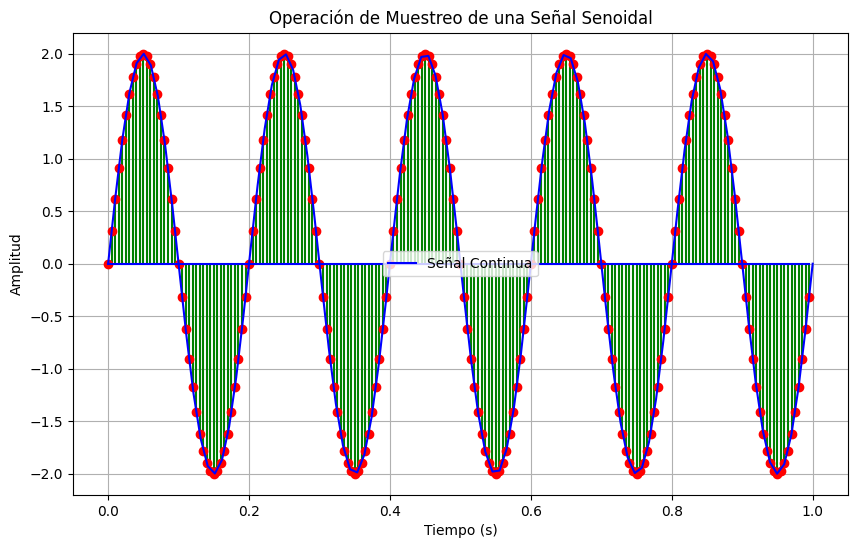

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal senoidal
frecuencia = 5  # Hz
A = 2
t= 1  # segundos

# Parámetros de la operación de muestreo
tasa_muestreo_original = 100  # Hz
tasa_muestreo_nueva = 200  # Hz

#  dominio de tiempo continuo
t_continuo = np.linspace(0, t, t * tasa_muestreo_original)

# señal senoidal continua
senal_continua = A * np.sin(2 * np.pi * frecuencia * t_continuo)

# operación de muestreo
# Tomo muestras de la señal continua en el nuevo intervalo de muestreo
t_muestreo_nueva = np.arange(0, t, 1/tasa_muestreo_nueva)
muestras_senal = A* np.sin(2 * np.pi * frecuencia * t_muestreo_nueva)

# Graficar la señal continua original y las muestras resultantes
plt.figure(figsize=(10, 6))
plt.stem(t_muestreo_nueva, muestras_senal, linefmt='g-', markerfmt='ro', basefmt='b-')
plt.plot(t_continuo, senal_continua, 'b-', label='Señal Continua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Operación de Muestreo de una Señal Senoidal')
plt.legend()
plt.grid(True)
plt.show()


### 3.3 Genere una señal Triangular y realice la operación de sampleo

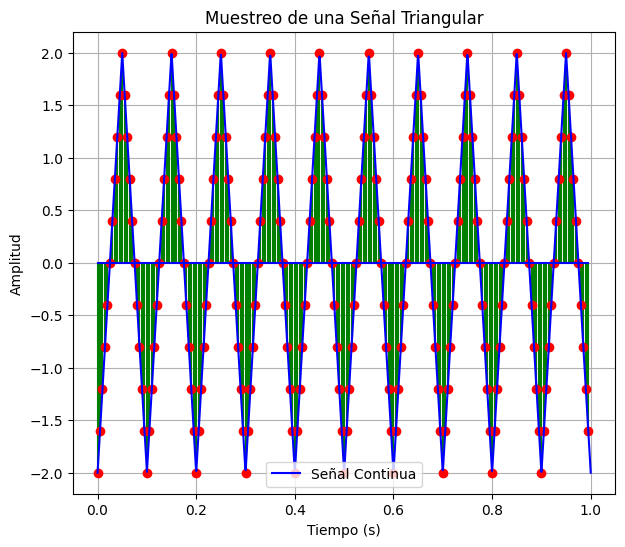

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros de la señal triangular
A = 2
frecuencia = 10  # Hz

# Parámetros de la operación de muestreo
tm_o = 1000  # Hz
tm_nu = 200  # Hz

#  dominio de tiempo continuo
time_c = np.linspace(0, 1, tm_o)

#  señal triangular continua
senal_c = A* signal.sawtooth(2 * np.pi * frecuencia * t_continuo, width=0.5)

#  operación de muestreo
t_muestreo_nueva = np.arange(0, 1, 1/tm_nu)
muestras_senal = A* signal.sawtooth(2 * np.pi * frecuencia * t_muestreo_nueva, width=0.5)

# señal continua original y muestras resultantes
plt.figure(figsize=(7, 6))
plt.stem(t_muestreo_nueva, muestras_senal, linefmt='g-', markerfmt='ro', basefmt='b-')
plt.plot(time_c, senal_c, 'b-', label='Señal Continua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Muestreo de una Señal Triangular')
plt.legend()
plt.grid(True)
plt.show()





### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

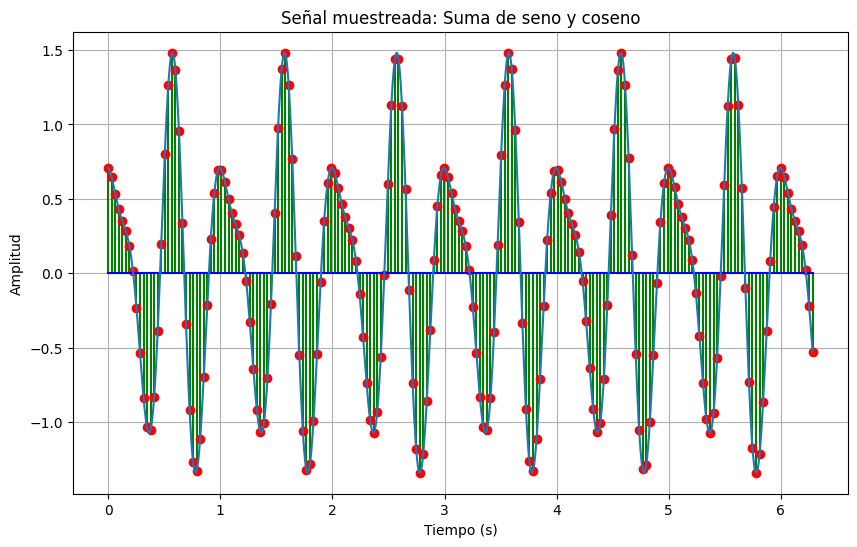

In [144]:
import numpy as np
import matplotlib.pyplot as plt

#  parámetros de las señales
A1, A2 = 1, 0.5  # Amplitudes
f1, f2 = 2, 3    # Frecuencias (en Hz)
phi1, phi2 = np.pi/4, np.pi/2  # Fases (en radianes)

# intervalo de tiempo
t = np.linspace(0, 2*np.pi, 1000)  # Intervalo de 0 a 2*pi

# señales senoidal y cosenoidal
y = A1 * np.sin(2*np.pi*f1*t + phi1)
X = A2 * np.cos(2*np.pi*f2*t + phi2)

# Sumar las señales
y_total = y + X

# Muestrear la señal resultante
t_muestreo = np.linspace(0, 2*np.pi, 200)  # Muestreo con 100 puntos de tiempo
muestras_senal = A1 * np.sin(2*np.pi*f1*t_muestreo + phi1) + A2 * np.cos(2*np.pi*f2*t_muestreo + phi2)

# Graficar la señal resultante muestreada
plt.figure(figsize=(10, 6))
plt.stem(t_muestreo, muestras_senal, linefmt='g-', markerfmt='ro', basefmt='b-')
plt.plot(t, y_total)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal muestreada: Suma de seno y coseno')
plt.grid(True)
plt.show()


### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax.

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

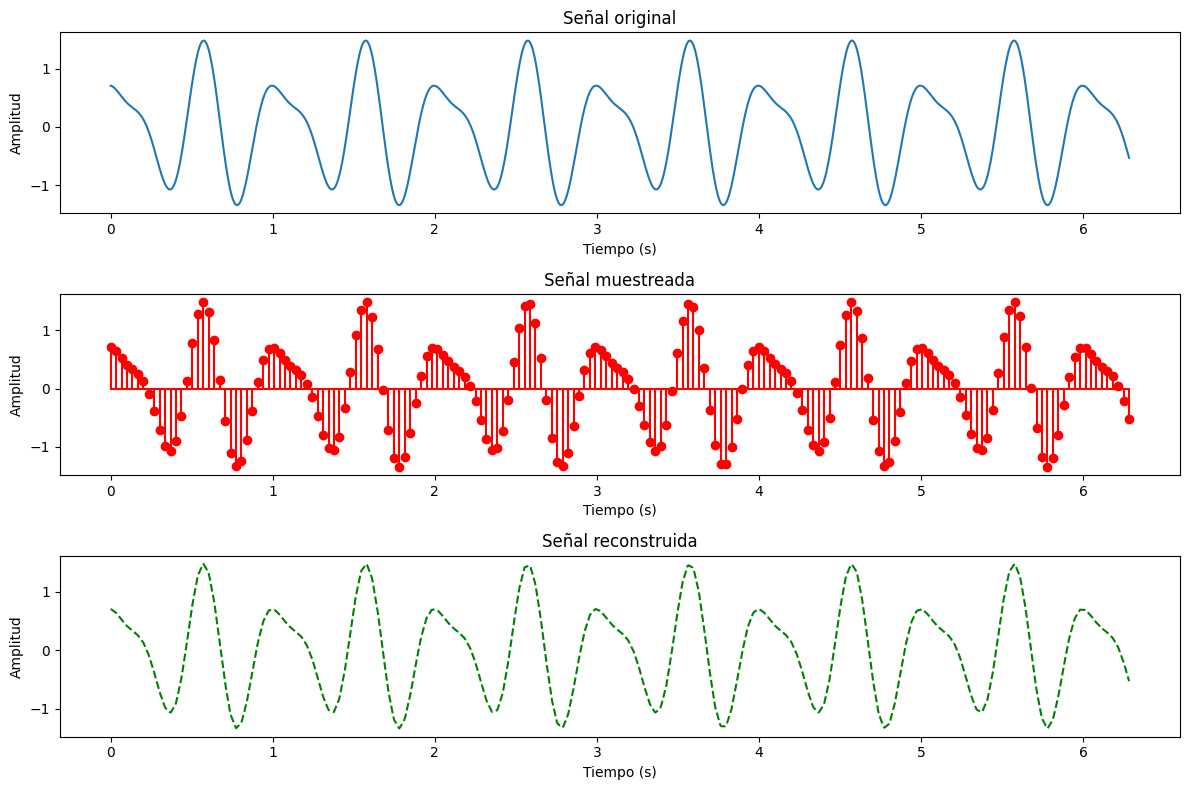

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# parámetros de las señales
A1, A2 = 1, 0.5  # Amplitudes
f1, f2 = 2, 3    # Frecuencias en Hz
p1, p2 = np.pi/4, np.pi/2  # Fases

# tiempo para la señal original
t_o = np.linspace(0, 2*np.pi, 1000)  #  0 a 2*pi

# señales senoidal y cosenoidal
y = A1 * np.sin(2*np.pi*f1*t_o + p1)
X = A2 * np.cos(2*np.pi*f2*t_o + p2)

# Sumar las señales
y_total = y + X

# frecuencia de muestreo
f_m = 10 * max(f1, f2)  # Frecuencia de muestreo mayor que la frecuencia máxima

# Muestrear la señal original
t_m = np.linspace(0, 2*np.pi, int(2*np.pi*f_m))  # tiempo de muestreo
m_senal = A1 * np.sin(2*np.pi*f1*t_muestreo + p1) + A2 * np.cos(2*np.pi*f2*t_muestreo + p2)

# Interpolar para reconstruir la señal a partir de las muestras
t_reconstruccion = np.linspace(0, 2*np.pi, 1000)  # tiempo para la reconstrucción
s_reconstruida = np.interp(t_reconstruccion, t_muestreo, m_senal)

# Graficar las señales
plt.figure(figsize=(12, 8))

# Señal original
plt.subplot(3, 1, 1)
plt.plot(t_original, y_total, label='Señal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal original')

# Señal muestreada
plt.subplot(3, 1, 2)
plt.stem(t_muestreo, muestras_senal, linefmt='r-', markerfmt='ro', basefmt='r-', label='Señal muestreada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal muestreada')

# Señal reconstruida
plt.subplot(3, 1, 3)
plt.plot(t_reconstruccion, senal_reconstruida, 'g--', label='Señal reconstruida')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal reconstruida')

plt.tight_layout()
plt.show()




### 3.6 Explica tus hallazgos

**Señal Original:**

En la primera gráfica, mostramos la señal original, que es la suma de una señal senoidal y una señal cosenoidal. Esta señal tiene una forma de onda compleja debido a la combinación de ambas funciones.
Se observa que la señal tiene una frecuencia fundamental determinada por la frecuencia más alta entre las dos señales componentes, que es 3 Hz en este caso.

**Señal Muestreada:**

En la segunda gráfica, mostramos la señal muestreada. Utilizamos una frecuencia de muestreo mayor que la frecuencia máxima de las señales originales para evitar el aliasing.
La señal muestreada consiste en una serie de muestras tomadas a intervalos regulares de tiempo. Cada muestra representa el valor de la señal original en ese punto en el tiempo.
Podemos observar que las muestras capturan la forma de onda de la señal original, pero como las muestras son discretas, la señal muestreada parece estar formada por impulsos.

**Señal Reconstruida:**

En la tercera gráfica, mostramos la señal reconstruida a partir de las muestras muestreadas.
Utilizamos el proceso de interpolación para reconstruir la señal continua a partir de las muestras discretas.
La señal reconstruida se asemeja mucho a la señal original, lo que indica que el proceso de muestreo y reconstrucción ha sido efectivo.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py